In [2]:
import json
import os
import random
from PIL import Image
from pycocotools import mask as maskUtils
import matplotlib.pyplot as plt
import numpy as np


ann_file = "/data/textvqa/TextOCR_0.1_val.json"
img_dir = "/data/textvqa/images"

with open(ann_file, 'r') as f:
    all_anns = json.load(f)

In [3]:
all_anns.keys()

dict_keys(['info', 'imgs', 'anns', 'imgToAnns'])

In [4]:
all_img_ids = list(all_anns["imgs"].keys())

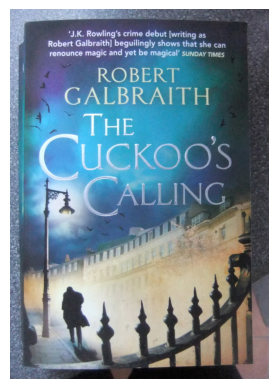

Num anns 26
{'id': 'cdbf5361fa660ff7_1', 'image_id': 'cdbf5361fa660ff7', 'bbox': [159.6, 57.91, 47.44, 21.77], 'utf8_string': "'J.K.", 'points': [159.6, 57.91, 207.04, 58.24, 206.71, 78.38, 160.58, 79.68], 'area': 1032.77}
'J.K.


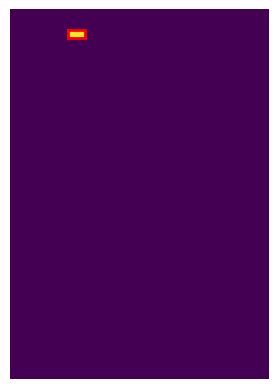

{'id': 'cdbf5361fa660ff7_2', 'image_id': 'cdbf5361fa660ff7', 'bbox': [211.26, 55.31, 98.11, 27.62], 'utf8_string': "Rowling's", 'points': [211.26, 55.31, 309.37, 57.26, 308.72, 81.31, 211.91, 82.93], 'area': 2709.8}
Rowling's


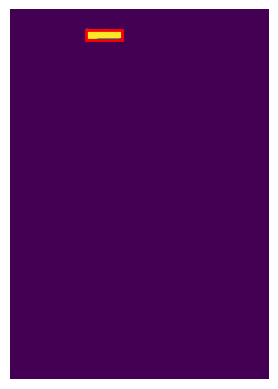

{'id': 'cdbf5361fa660ff7_3', 'image_id': 'cdbf5361fa660ff7', 'bbox': [103.72, 85.2, 72.78, 21.12], 'utf8_string': 'Robert', 'points': [103.72, 85.2, 174.55, 85.2, 176.5, 106.32, 105.02, 106.0], 'area': 1537.11}
Robert


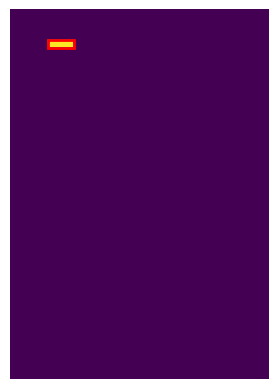

{'id': 'cdbf5361fa660ff7_4', 'image_id': 'cdbf5361fa660ff7', 'bbox': [108.27, 115.09, 94.22, 17.55], 'utf8_string': 'renounce', 'points': [108.6, 116.72, 202.16, 115.09, 202.49, 131.34, 108.27, 132.64], 'area': 1653.56}
renounce


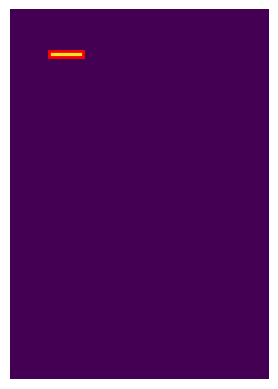

{'id': 'cdbf5361fa660ff7_5', 'image_id': 'cdbf5361fa660ff7', 'bbox': [206.39, 109.25, 62.05, 26.64], 'utf8_string': 'magic', 'points': [206.39, 109.25, 268.44, 111.19, 268.44, 135.89, 208.01, 135.89], 'area': 1653.01}
magic


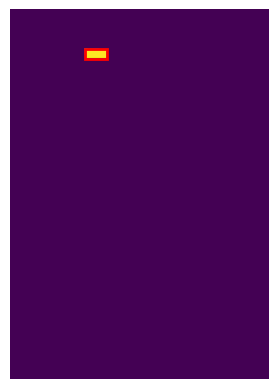

In [72]:
sample_idx = random.randint(0, len(all_img_ids))
img_id = all_img_ids[sample_idx]
img_file = os.path.join(img_dir, f"{img_id}.jpg")
img = Image.open(img_file)
img_w, img_h = img.size
plt.imshow(img)
plt.axis("off")
plt.show()

cnt = 0
ann_ids = all_anns["imgToAnns"][img_id]
print("Num anns", len(ann_ids))
for ann_id in ann_ids:
    ann = all_anns["anns"][ann_id]
    print(ann)
    polygon = np.array(ann["points"])
    rle = maskUtils.frPyObjects([polygon], img_h, img_w)[0]
    mask = maskUtils.decode(rle)

    print(ann["utf8_string"])
    plt.imshow(mask)
    # draw box
    box = ann["bbox"]
    x, y, w, h = box
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='r', linewidth=2))

    plt.axis("off")
    plt.show()
    cnt += 1
    if cnt == 5:
        break

In [19]:
sorted(num_masks, reverse=True)[:10]

[2167, 1522, 1006, 839, 826, 787, 751, 719, 707, 703]

0.004684514201962858
0.0025324205487838817


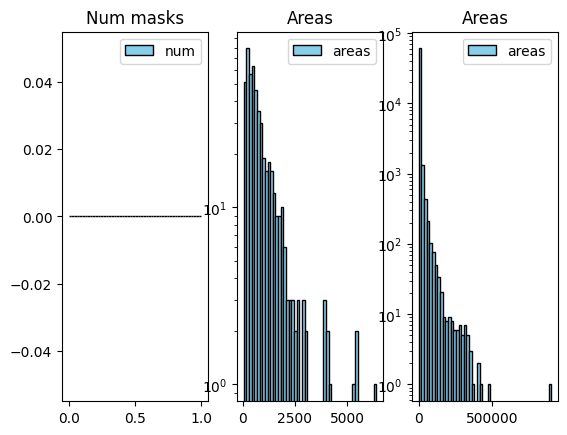

In [75]:
num_masks = []
mask_areas = []
all_mask_areas = []

cutoff_areas = []
cutoff_num = 50
for img_id in all_img_ids:
    ann_ids = all_anns["imgToAnns"][img_id]
    num_valid_masks = 0
    anns = [all_anns["anns"][ann_id] for ann_id in ann_ids if all_anns["anns"][ann_id]["utf8_string"] != "."]
    anns = sorted(anns, key=lambda x: x["area"], reverse=True)

    mask_areas.extend([ann["area"] for ann in anns[:cutoff_num]])
    all_mask_areas.extend([ann["area"] for ann in anns])
    if len(anns) > cutoff_num:
        cutoff_areas.append(anns[cutoff_num]["area"])

    # for ann_id in ann_ids:
    #     ann = all_anns["anns"][ann_id]
    #     area = ann["area"]
    #     if area > 800:
    #         mask_areas.append(ann["area"])
    #         num_valid_masks += 1
    
    # num_masks.append(num_valid_masks)

# num_masks = sorted(num_masks, reverse=True)[100:]
# num_masks_less = [n for n in num_masks if n < 100]
# print(len(num_masks_less) / len(num_masks))

# num_masks_small = [n for n in mask_areas if n < 100]
# print(len(num_masks_small) / len(mask_areas))

print(len(cutoff_areas) / len(all_mask_areas))

cutoff_areas_large = [n for n in cutoff_areas if n > 500]
print(len(cutoff_areas_large) / len(all_mask_areas))

fig, axs = plt.subplots(1, 3)

# bins = np.arange(min(num_masks), max(num_masks) + 2) - 0.5
axs[0].hist(
    num_masks,
    bins=50,
    color="skyblue",
    edgecolor="black",
    label="num",
)
axs[0].set_title("Num masks")
# axs[0].set_yscale("log")
axs[0].legend()


axs[1].hist(
    cutoff_areas,
    bins=50,
    color="skyblue",
    edgecolor="black",
    label="areas",
)
axs[1].set_title("Areas")
axs[1].set_yscale("log")
axs[1].legend()

axs[2].hist(
    mask_areas,
    bins=50,
    color="skyblue",
    edgecolor="black",
    label="areas",
)
axs[2].set_title("Areas")
axs[2].set_yscale("log")
axs[2].legend()
